# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

# Loading Dataset

In [2]:
data = pd.read_excel("Flight_Data.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Checking For Nan Values in Dataset

In [5]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data['Total_Stops'][data['Total_Stops'].isna()]

9039    NaN
Name: Total_Stops, dtype: object

In [7]:
data['Route'][data['Route'].isna()]

9039    NaN
Name: Route, dtype: object

In [8]:
data.dropna(inplace=True) # As there is only one missing data. so it can be easily dropout.

In [9]:
data.iloc[9039,:]

Airline                        Air India
Date_of_Journey               21/03/2019
Source                             Delhi
Destination                       Cochin
Route              DEL → LKO → BOM → COK
Dep_Time                           12:20
Arrival_Time                19:15 22 Mar
Duration                         30h 55m
Total_Stops                      2 stops
Additional_Info                  No info
Price                              10703
Name: 9040, dtype: object

In [10]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Handling Data of Date-Time Format

Date_of_Journey column of dataset is of form of object data type. So it is needed to first convert it into time-stamp and then extract required details from it.

In [14]:
pd.to_datetime('24/03/2019').day, pd.to_datetime('24/03/2019').month

(24, 3)

In [15]:
Date_of_Journey_Day = []
Date_of_Journey_Month = []
for k in range((data.shape[0])):
    date = pd.to_datetime(data.iloc[k, :]['Date_of_Journey'])
    Date_of_Journey_Day.append(date.day)
    Date_of_Journey_Month.append(date.month)
data['Date_of_Journey_Day'] = Date_of_Journey_Day
data['Date_of_Journey_Month'] = Date_of_Journey_Month

In [16]:
data.drop('Date_of_Journey', axis=1, inplace=True) # As we have converted Date_of_Journey in required column. so it is of no need. so we can drop it.

In [17]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


In [18]:
Dep_Time_Hour = []
Dep_Time_Minute = []
for k in range(data.shape[0]):
    Dep_Time_Hour.append(pd.to_datetime(data['Dep_Time'].iloc[k]).hour)
    Dep_Time_Minute.append(pd.to_datetime(data['Dep_Time'].iloc[k]).minute)
data['Dep_Time_Hour'] = Dep_Time_Hour
data['Dep_Time_Minute'] = Dep_Time_Minute
data.drop('Dep_Time', axis=1, inplace=True)

In [19]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


In [20]:
Arrival_Time_Hour = []
Arrival_Time_Minute = []
for k in range(data.shape[0]):
    Arrival_Time_Hour.append(pd.to_datetime(data['Arrival_Time'].iloc[k]).hour)
    Arrival_Time_Minute.append(pd.to_datetime(data['Arrival_Time'].iloc[k]).minute)
data['Arrival_Time_Hour'] = Arrival_Time_Hour
data['Arrival_Time_Minute'] = Arrival_Time_Minute
data.drop('Arrival_Time', axis=1, inplace=True)

In [21]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


Apply preprocessing on Duration Column so that it can converted into Duration_Hour and Duration_Minute

In [22]:
Duration_Hour = []
Duration_Minute = []
for k in range(data.shape[0]):
    duration = data['Duration'].iloc[k].split()
    if len(duration)==1:
        if duration[0][-1]=="h":
            Duration_Hour.append(int(duration[0][:-1]))
            Duration_Minute.append(0)
        else:
            Duration_Hour.append(0)
            Duration_Minute.append(int(duration[0][:-1]))
    else:
        Duration_Hour.append(int(duration[0][:-1]))
        Duration_Minute.append(int(duration[1][:-1]))
data['Duration_Hour'] = Duration_Hour
data['Duration_Minute'] = Duration_Minute
data.drop('Duration', axis=1, inplace=True) # Drop Duration column as it is of no need now.

In [23]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


# Handling Categorical Data

In [24]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

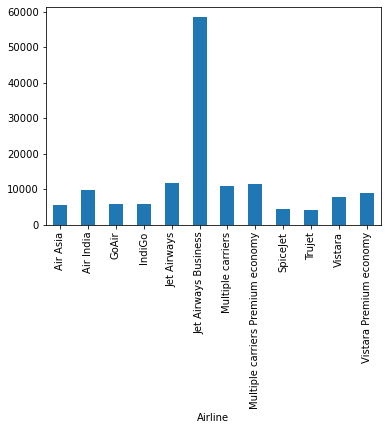

In [25]:
data.groupby('Airline')['Price'].mean().plot.bar() # Jet-Airways have highest price among all available airlines.

In [26]:
# Performing OneHot Encoding on Airline column as it has less unique values.
data = pd.concat([data, pd.get_dummies(data['Airline'])], axis=1)
data.drop('Airline', axis=1, inplace=True)
data.head()

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0


In [27]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

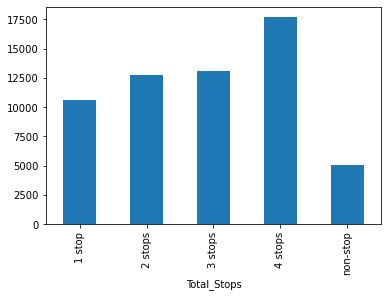

In [28]:
data.groupby('Total_Stops')['Price'].mean().plot.bar() # It is seen that airline having 4 stops have more price in comparison to airline having less stops.

In [29]:
data['Total_Stops'] = data['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [30]:
data.head(2)

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0


In [31]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

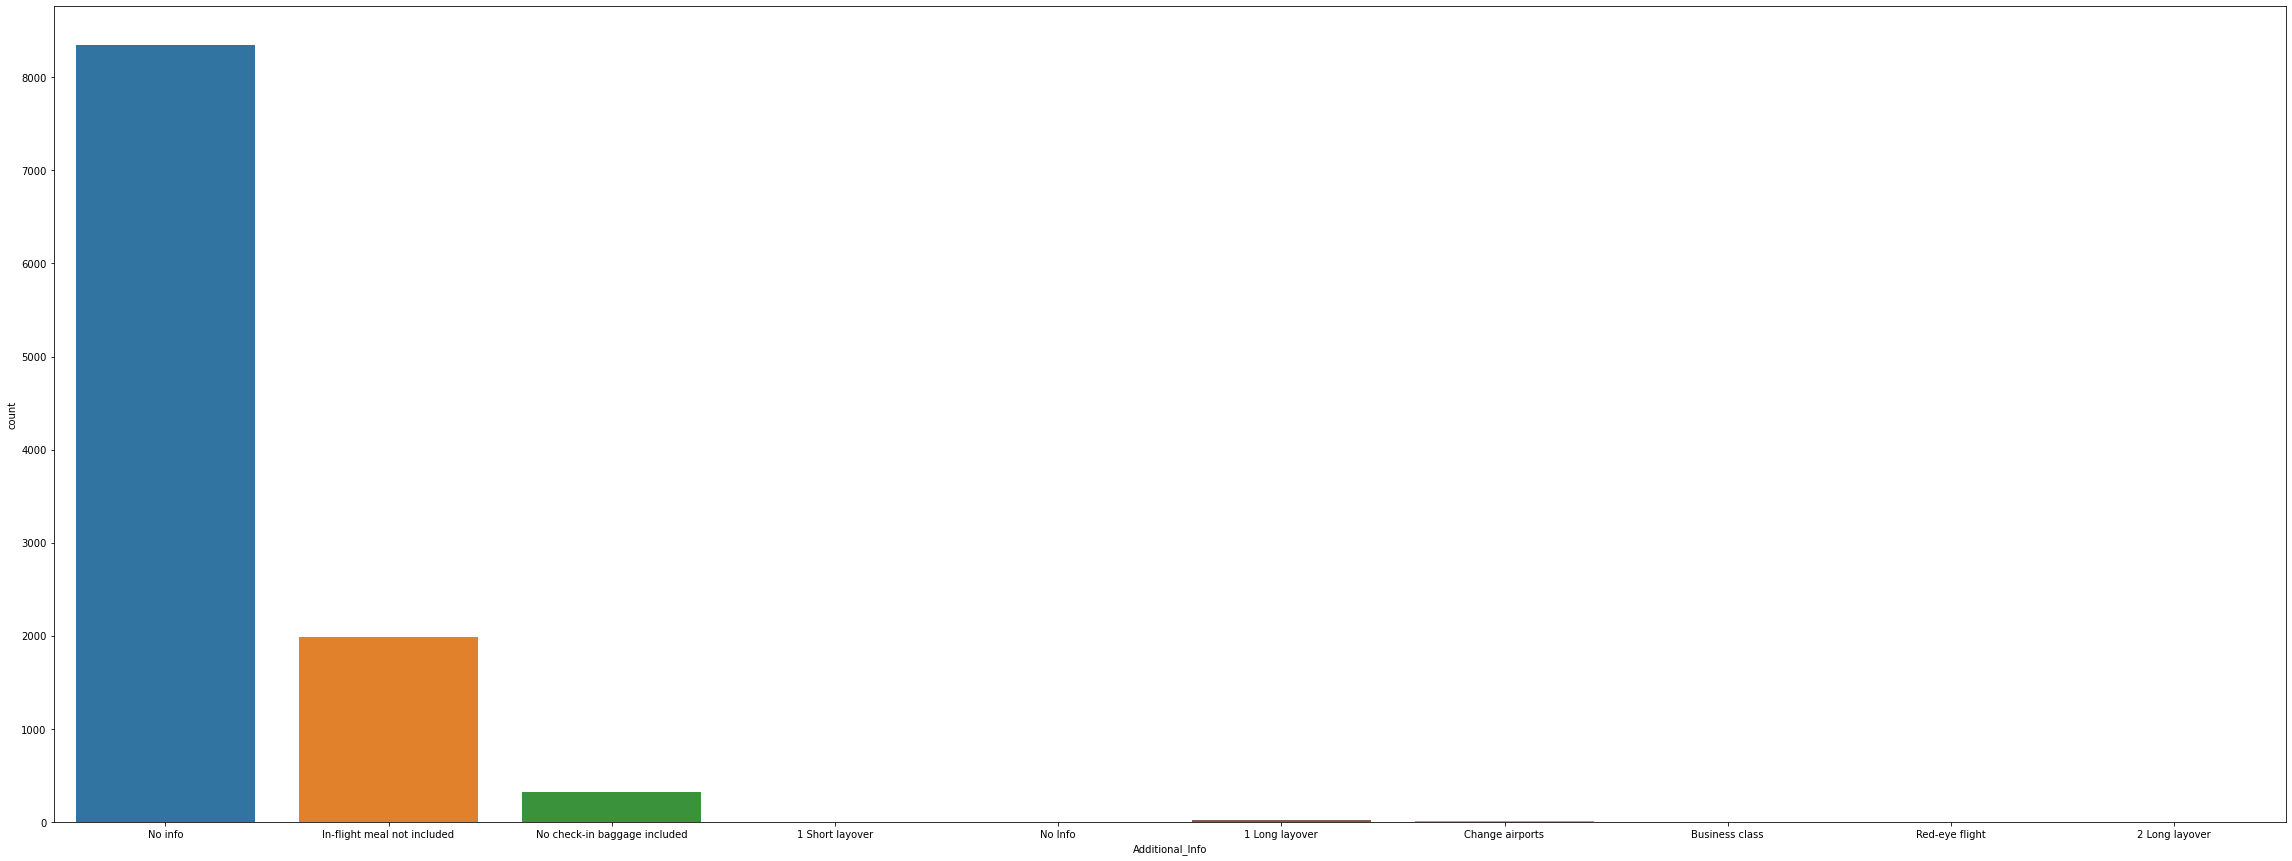

In [32]:
plt.figure(figsize=(40, 15))
sns.countplot(data['Additional_Info']) # It is seen that around 80% of Additional_Info of dataset having No Info. So, Need to drop out this column.

In [33]:
data.drop('Additional_Info', axis=1, inplace=True)

In [34]:
data.head(2)

,Source,Destination,Route,Total_Stops,Price,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0


Spliting Route Column of dataset into 5 different route column as dataset have maximum of 4 stops and whenever data is not available then the None value is fitted into that column

In [35]:
Route = [[] for _ in range(5)]
for k in range(data.shape[0]):
    routeArray = data['Route'].iloc[k].split('→')
    route = len(routeArray)
    for x in range(5):
        if x<route:
            Route[x].append(routeArray[x])
        else:
            Route[x].append('None')
for k in range(5):
    data[f"Route{k+1}"] = Route[k]

In [36]:
data.head(2)

,Source,Destination,Route,Total_Stops,Price,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Route1,Route2,Route3,Route4,Route5
0,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,BLR,DEL,None,None,None
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,CCU,IXR,BBI,BLR,None


In [37]:
from sklearn.preprocessing import LabelEncoder
for k in range(5):
    data[f"Route{k+1}"] = LabelEncoder().fit_transform(data[f"Route{k+1}"])

In [38]:
data.drop('Route', axis=1, inplace=True)

In [39]:
data.head(2)

,Source,Destination,Total_Stops,Price,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Route1,Route2,Route3,Route4,Route5
0,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,0,13,29,13,5
1,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,2,25,1,3,5


In [40]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

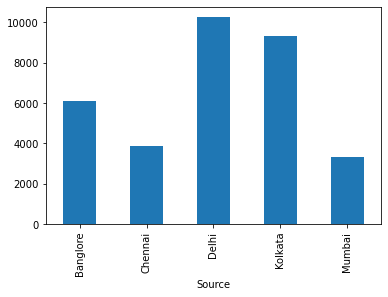

In [41]:
data.groupby('Source')['Price'].median().plot.bar()

In [42]:
data.drop('Source', axis=1, inplace=True)

In [43]:
data.head(2)

,Destination,Total_Stops,Price,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Route1,Route2,Route3,Route4,Route5
0,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,0,13,29,13,5
1,Banglore,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,2,25,1,3,5


In [44]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

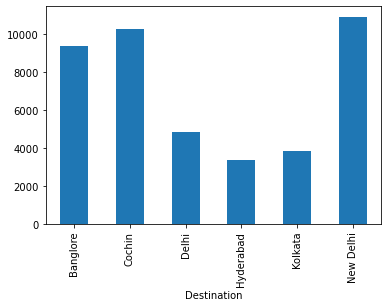

In [45]:
data.groupby('Destination')['Price'].median().plot.bar()

In [46]:
data.drop('Destination', axis=1, inplace=True)

In [47]:
data.head(2)

,Total_Stops,Price,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Route1,Route2,Route3,Route4,Route5
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,0,13,29,13,5
1,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,2,25,1,3,5


# Outlier Detection

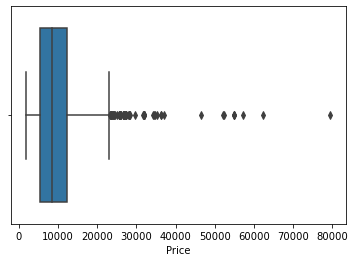

In [48]:
sns.boxplot(data['Price'])

In [49]:
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])

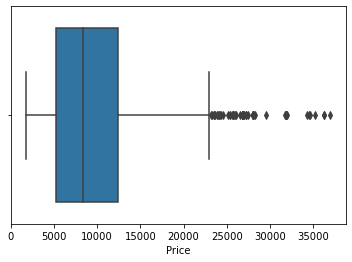

In [50]:
sns.boxplot(data['Price'])

Spliting Dataset into Dependent and Independent Dataset

In [51]:
X = data.drop('Price', axis=1)
y = data['Price']

In [52]:
X

,Total_Stops,Date_of_Journey_Day,Date_of_Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Route1,Route2,Route3,Route4,Route5
0,0,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,0,13,29,13,5
1,2,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,2,25,1,3,5
2,2,6,9,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,3,32,4,5,5
3,1,5,12,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,2,34,3,13,5
4,1,3,1,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4,9,19,55,22,25,2,30,1,0,0,0,0,0,0,0,0,0,0,0,2,5,29,13,5
10679,0,27,4,20,45,23,20,2,35,0,1,0,0,0,0,0,0,0,0,0,0,2,5,29,13,5
10680,0,27,4,8,20,11,20,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13,29,13,5
10681,0,3,1,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5


In [53]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

Feature Selection Using Information Gain

In [54]:
from sklearn.feature_selection import mutual_info_classif

In [55]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.148649
Date_of_Journey_Day,1.098592
Date_of_Journey_Month,0.844543
Dep_Time_Hour,1.446942
Dep_Time_Minute,1.154245
Arrival_Time_Hour,1.835535
Arrival_Time_Minute,1.530647
Duration_Hour,1.786891
Duration_Minute,1.086456
Air Asia,0.155831


In [56]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.747228
Route3,2.339377
Total_Stops,2.148649
Route1,2.057254
Arrival_Time_Hour,1.835535
Duration_Hour,1.786891
Arrival_Time_Minute,1.530647
Route4,1.450964
Dep_Time_Hour,1.446942
Dep_Time_Minute,1.154245


Spliting Dataset into train and test dataset

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Training the model

In [58]:
from sklearn import metrics
from collections import defaultdict
def predict_model(ml_model):
    score = defaultdict(int)
    reg = ml_model
    reg.fit(X_train, y_train)
    score['Training_Score'] = reg.score(X_train,y_train)
    score['Testing score'] = reg.score(X_test,y_test)
    score['Mean_Absolute_Error'] = metrics.mean_absolute_error(y_test, reg.predict(X_test))
    score['Mean_Squared_Error'] = metrics.mean_squared_error(y_test, reg.predict(X_test))
    score['Root_Mean_Squared_Error'] = np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test)))
    return score

Train dataset onto different ml-algorithm

Random Forest Regressor Algorithm

In [59]:
from sklearn.ensemble import RandomForestRegressor
predict_model(RandomForestRegressor())

defaultdict(int,
            {'Training_Score': 0.9537009428054201,
             'Testing score': 0.8229979791097222,
             'Mean_Absolute_Error': 1136.176397547521,
             'Mean_Squared_Error': 3367370.9702330288,
             'Root_Mean_Squared_Error': 1835.039773474414})

Decision Tree Regressor Algorithm

In [60]:
from sklearn.tree import DecisionTreeRegressor
predict_model(DecisionTreeRegressor())

defaultdict(int,
            {'Training_Score': 0.9671843833240152,
             'Testing score': 0.718327391732257,
             'Mean_Absolute_Error': 1277.807440336921,
             'Mean_Squared_Error': 5358674.208463318,
             'Root_Mean_Squared_Error': 2314.8810354882858})

Linear Regression Algorithm

In [61]:
from sklearn.linear_model import LinearRegression
predict_model(LinearRegression())

defaultdict(int,
            {'Training_Score': 0.5927244140022152,
             'Testing score': 0.6122338373735667,
             'Mean_Absolute_Error': 1937.7785753485555,
             'Mean_Squared_Error': 7377048.650062229,
             'Root_Mean_Squared_Error': 2716.0722836592968})

K-Nearest Neighbors Regressor Algorithm

In [62]:
from sklearn.neighbors import KNeighborsRegressor
predict_model(KNeighborsRegressor())

defaultdict(int,
            {'Training_Score': 0.7783257526055203,
             'Testing score': 0.6721574783094506,
             'Mean_Absolute_Error': 1669.889845577913,
             'Mean_Squared_Error': 6237032.689209172,
             'Root_Mean_Squared_Error': 2497.4051912353293})

Support Vector Regressor Algorithm

In [63]:
from sklearn.svm import SVR
predict_model(SVR(kernel = "linear"))

defaultdict(int,
            {'Training_Score': 0.5025956580457495,
             'Testing score': 0.5150777711081108,
             'Mean_Absolute_Error': 2058.0604000883163,
             'Mean_Squared_Error': 9225392.05020418,
             'Root_Mean_Squared_Error': 3037.333048943461})

XGBoost Regressor Algorithm

In [58]:
from xgboost import XGBRegressor
predict_model(XGBRegressor())

defaultdict(int,
            {'Training_Score': 0.9293202825784669,
             'Testing score': 0.8564356845265888,
             'Mean_Absolute_Error': 1066.1109588865816,
             'Mean_Squared_Error': 2591718.1338008163,
             'Root_Mean_Squared_Error': 1609.8814036446338})

# Hyperparameter Tuning

Randomized Search CV Tuning Algorithm

In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
reg = RandomForestRegressor()
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(100, 1200, 6)], # Number of trees in random forest
    'max_features': ['auto','sqrt'], # Number of features to consider at every split
    'max_depth': [int(x) for x in np.linspace(5,30,4)], # Maximum number of levels in tree
    'min_samples_split': [5,10,15,100] # Minimum number of samples required to split a node
}
random = RandomizedSearchCV(estimator=reg, param_distributions=random_grid, cv=5, verbose=2, n_jobs=-1)
pipe = Pipeline([
    ('random', random),
])
pipe.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.0min finished


Pipeline(steps=[('random',
                 RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                                    n_jobs=-1,
                                    param_distributions={'max_depth': [5, 13,
                                                                       21, 30],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_split': [5,
                                                                               10,
                                                                               15,
                                                                               100],
                                                         'n_estimators': [100,
                                                                          320,
                                   

In [65]:
pipe.named_steps["random"].best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 30}

In [66]:
pipe.named_steps["random"].best_score_

0.8374663428343384

In [67]:
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9095403310494767, 0.8566701483333449)

Save the model to reuse it again

In [68]:
import pickle

In [69]:
with open('flight.pkl', 'wb') as fl:
    pickle.dump(pipe, fl)

In [70]:
with open('flight.pkl', 'rb') as fl:
    model = pickle.load(fl)

In [71]:
model.score(X_test, y_test)

0.8566701483333449